# Building a Simple Linear Regression Model to predict the Salary of a MBA student based on grade 10


In [2]:
# Step 0 Import all libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 

In [3]:
# Step 1 Collect data/Read Data

mba_salary_df=pd.read_csv("MBA Salary.csv")

In [4]:
mba_salary_df.head(5) ## Check the data display

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [5]:
# Step 2 Data pre-processing, Check more information, missing values and any outliers

mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [6]:
mba_salary_df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [7]:
mba_salary_df.isna()

,S. No.,Percentage in Grade 10,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [8]:
mba_salary_df.isnull().sum()

S. No.                    0
Percentage in Grade 10    0
Salary                    0
dtype: int64

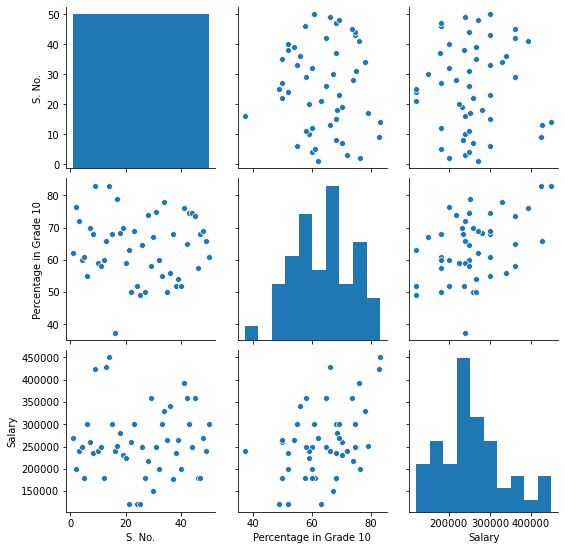

In [9]:
sn.pairplot(mba_salary_df)

# Creating Feature Set(X) and Outcome Variable(Y)

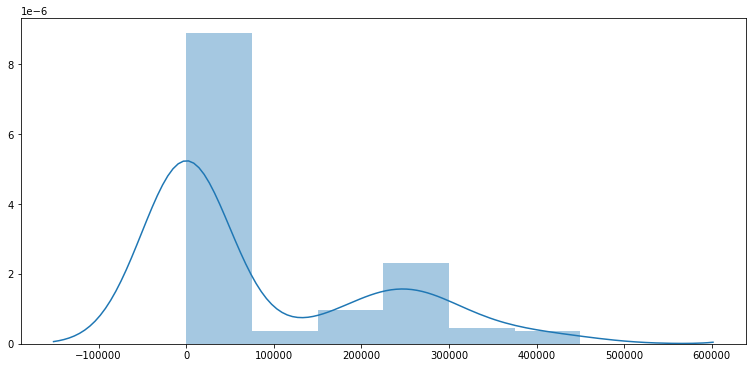

<bound method DataFrame.kurt of     S. No.  Percentage in Grade 10  Salary
0        1                   62.00  270000
1        2                   76.33  200000
2        3                   72.00  240000
3        4                   60.00  250000
4        5                   61.00  180000
5        6                   55.00  300000
6        7                   70.00  260000
7        8                   68.00  235000
8        9                   82.80  425000
9       10                   59.00  240000
10      11                   58.00  250000
11      12                   60.00  180000
12      13                   66.00  428000
13      14                   83.00  450000
14      15                   68.00  300000
15      16                   37.33  240000
16      17                   79.00  252000
17      18                   68.40  280000
18      19                   70.00  231000
19      20                   59.00  224000
20      21                   63.00  120000
21      22            

In [10]:
plt.figure(figsize=(13,6))
sn.distplot(mba_salary_df)
plt.show()
mba_salary_df.skew
mba_salary_df.kurtosis

In [11]:
import statsmodels.api as sm  ## Stats model library

X=sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [12]:
Y=mba_salary_df['Salary']
Y.head(5)

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

In [13]:
length_x=len(X)
length_y=len(Y)

print("length of x is:", length_x)
print("length of y is:", length_y)

length of x is: 50
length of y is: 50


# Step3 : Splitting the dataset into training and validation sets


In [14]:
from sklearn.model_selection import train_test_split
# machine learning library

In [15]:
train_X,test_X,train_y,test_y=train_test_split(X,Y, test_size=0.2, random_state=100 )

# Step 4: Fitting the Model on training data

In [16]:
mba_salary_lm=sm.OLS(train_y,train_X)

In [17]:
mba_salary_model=mba_salary_lm.fit()

In [18]:
print(mba_salary_model.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [19]:
mba_salary_model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001B5163284F0>>

# Summary of the model to understand the statistics

In [20]:
print("overrall summary is given by:",mba_salary_model.summary2() )

overrall summary is given by:                           Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2022-05-29 17:58      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 

# Residual Analysis

# Checking the normality

In [21]:
%matplotlib inline
from scipy import stats

<Figure size 576x432 with 0 Axes>

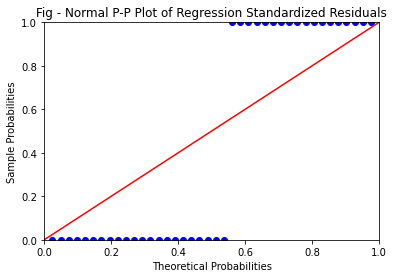

In [22]:
mba_salary_resid = mba_salary_model.resid
probplot = sm.ProbPlot( mba_salary_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

# Outlier Analysis

In [23]:
#Z- Score Analysis
from scipy.stats import zscore

In [24]:
mba_salary_df['z_score_salary']=zscore(mba_salary_df.Salary)

In [25]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary <-3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


In [26]:
print(mba_salary_df)

    S. No.  Percentage in Grade 10  Salary  z_score_salary
0        1                   62.00  270000        0.155481
1        2                   76.33  200000       -0.766241
2        3                   72.00  240000       -0.239543
3        4                   60.00  250000       -0.107868
4        5                   61.00  180000       -1.029590
5        6                   55.00  300000        0.550505
6        7                   70.00  260000        0.023807
7        8                   68.00  235000       -0.305380
8        9                   82.80  425000        2.196439
9       10                   59.00  240000       -0.239543
10      11                   58.00  250000       -0.107868
11      12                   60.00  180000       -1.029590
12      13                   66.00  428000        2.235941
13      14                   83.00  450000        2.525625
14      15                   68.00  300000        0.550505
15      16                   37.33  240000       -0.2395

In [33]:
# Get the model tested on y data

pred_y=mba_salary_model.predict(test_X)
print(test_X)
#print(pred_y)

    const  Percentage in Grade 10
6     1.0                    70.0
36    1.0                    68.0
37    1.0                    52.0
28    1.0                    58.0
43    1.0                    74.5
49    1.0                    60.8
5     1.0                    55.0
33    1.0                    78.0
20    1.0                    63.0
42    1.0                    74.4


In [28]:
from sklearn import metrics

mean_l1_error_test=metrics.mean_absolute_error(test_y,pred_y)
print(mean_l1_error_test)

mean_squared_error_test=metrics.mean_squared_error(test_y,pred_y)
print(mean_squared_error_test)
print(np.sqrt(mean_squared_error_test))

#Rootmean_square_error_test=round(np.sqrt(metrics.mean_squared_error(test_y,pred_y)),10)
# Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)

#test_accuracy = mba_salary_lm.score(test_X,pred_y)
#print(test_accuracy)
#print(pd.DataFrame(zip(test_X,test_y,pred_y)))
#print("Mean error test is:",mean_l1_error_test)

59155.310447690215
5396084152.419213
73458.04348346894


# Calculation of prediction intervals

In [29]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predict y Values

pred_y=mba_salary_model.predict(test_X)
print(pred_y)

#predict the low and high interval values of the y

_,pred_y_low,pred_y_high= wls_prediction_std(mba_salary_model,test_X,alpha=0.1)

# store all the values in a data frame

pred_y_df=pd.DataFrame({'grade_10_perc':test_X['Percentage in Grade 10'],'pred_y':pred_y,
             'pred_y_left':pred_y_low,'pred_y_high':pred_y_high})


6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
49    247070.998530
5     226419.591709
33    308313.101515
20    254904.290772
42    295494.986937
dtype: float64


In [32]:
pred_y_df

,grade_10_perc,pred_y,pred_y_left,pred_y_high
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
